<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Measure/M06_Working_with_images_and_accessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **06 Measure** Working with images and accessing data
```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2024
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook explores how to work with image and access associated metadata (information about the photo). It assumes you've understood the first few notebooks. In particular, how we load in external libraries and packages, the basics of data structures and functions, and reading and writing files.

- PIL basics
- Accessing metadata

To open HEIC photos taken by iPhone, we'll need an additional package called `pillow-heif`.

In [ ]:
!pip install pillow-heif --quiet

⚠ **Restart your session after installing `pillow-heif`**

_If you run into `UnidentifiedImageError` in Colab after installing `pillow-heif` and attempting to open a HEIC file, restarting the session should help. In Colab, go to "Runtime" > "Restart session" in the file menu. After you do this, you will need to re-run the cells below, but you do not need to re-run `pip install`._

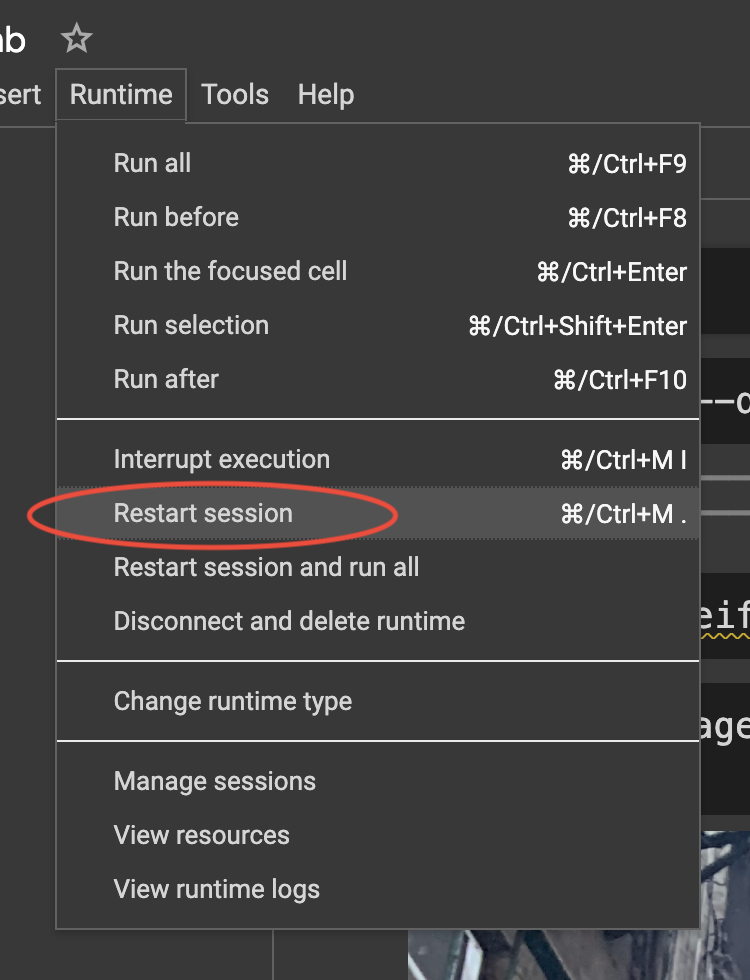

After installing the libraries, we'll need to import the right libraries into this notebook.

In [ ]:
import PIL
from pathlib import Path
from pillow_heif import HeifImagePlugin

... and connect to Google Drive and set the appropriate directory for the example data. You can find it here on [GitHub](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data). Or, try this with your own data!

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Don't forget to set the right path for your files!

In [ ]:
# If you're connected to Google Drive, your path might be something like: /content/drive/example/folder
EXAMPLE_DATA_DIRECTORY = "example_data"

## PIL basics
`PIL`, or the [Python Image Library](https://pillow.readthedocs.io/en/stable/), provides image operations in Python.

It won't replace more advanced image editing tools for design (like Photoshop), but it's a great way to work with image data more directly, efficiently, and in code.

Let's start by opening an image file, using the `Image` class to create an object. Basically, this opens the file and loads it into a Python format provided by `PIL` that we can work with.



In [ ]:
# Open an iPhone HEIC image stored on Google Drive
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "example_image_2.heic")

# The last line in a notebook cell will get rendered
img

`PIL` give you many ways to work with image right out-of-the-box. In this case, the `Image` class has both methods and attributes. Methods are functions attached to the class or object; attributes are data values attached to the class or object.

Complete object-oriented programming (OOP) is out-of-scope for this semester, but it's helpful to know that in Python, an object is a persistent "thing" that has associated information and actions. So in this case, you create an `Image` object, based on the class. And you can get information (properties and attributes) about the `Image`, and perform actions to and with it (methods).

Let's try to view some information — the **attributes** of the image.

In [ ]:
# Some simple attributes that give you information about the image
# What size is the image?
print(f"This image is {img.size} in pixel dimensions")

# What is the color mode of the image?
print(f"This image is in {img.mode} color mode")

# What's the full filename of this image?
print(f"The image is '{img.filename}'")

Pretty cool! You can find the complete list of `Image` attributes in the documentation for `PIL` [here](https://pillow.readthedocs.io/en/latest/reference/Image.html#image-attributes). Try to access a few new ones!

In [ ]:
# Let's see all the info about this image!
img.info

## Cropping an image

The `Image` class also provides some **methods** or functions associated with the image! For example, you can crop the image. Note that this uses a coordinate system where the origin is in the top-left: positive in the X direction it to the right, and positive in the Y direction is down. 

In [ ]:
# Let's use a variable to store the crop
crop_amount = 500

# The crop methods takes in a tuple, or sequence of values in parenthesis like so:
# crop(left, upper, right, lower)
# These define the left, upper, right and lower boundary of the crop
img.crop((crop_amount, crop_amount, img.width - crop_amount, img.height - crop_amount))

You can find all of the methods defined for the `Image` class [here in the docs](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.crop). Try calling some of those methods on your loaded image.

## Resizing an image
One useful method is `Image.resize()` which produces a re-sized version of your image. It takes one argument: a tuple or sequence of values in side parenthesis (), which define the width and height.

You can use this to shrink and re-format and image!

In [ ]:
# Resize the photo to be square
# resize((width, height))
smaller_img = img.resize((100, 100))
smaller_img

In [ ]:
# Resize the photo to be stretched
stretched_img = img.resize((400, 100))
stretched_img

Of course, if you don't want to distort your image you can use `Image.thumbnail()`. This wil shrink it to fit your provided dimensions, but preserve the aspect ratio.

Confusingly, `thumbnail()` has a different behavior to `resize()`. Rather than give you a new image it directly modifies the original image. To be safe, you can use another method, `Image.copy()` to make an extra copy of the image to thumbnail!

In [ ]:
# Notice that we call thumbnail() on a copy() of the image
# thumbnail() directly changes the image, vs. returning a new one
# This line produces a new image as a copy
new_img = img.copy()

# This line reduces the copied image to a thumbnail
new_img.thumbnail((100, 100))

# This line renders the thumbnail in the notebook
new_img

## Metadata

In addition to pixels, we can retrieve data about the image itself — its metadata.

`PIL` lets you access the metadata, known as Exchangeable Image File Format (EXIF) information, with `Image.getexif()`. This returns top-level information as key-value pairs, but also nests some information deeper.

That deeper information includes GPS data, and can be accessed with `get_ifd()`.

In [ ]:
def print_exif_info(image):
    """A helper function that prints EXIF information."""

    print(f"\n===== EXIF Metadata for {image.filename} =====")

    # Get the EXIF metadata
    img_exif = image.getexif()

    # This for loop iterates over img_exif
    # img_exif is structured like a dictionary — a set of key-value pairs
    # items() returns each pair one at a time
    for exif_tag, exif_value in img_exif.items():
        print(PIL.ExifTags.Base(exif_tag).name, exif_value)

    # In addition the base EXIF data, we can look for more IFDs
    # These are Image File Directories, and provide more info
    for ifd_id in PIL.ExifTags.IFD:
        # Not all images will have all IFDs!
        # The try here lets us view this info only if it exists
        try:
            ifd = img_exif.get_ifd(ifd_id)
            print(f"\n----- {ifd_id.name} -----")

            if ifd_id == PIL.ExifTags.IFD.GPSInfo:
                resolve = PIL.ExifTags.GPSTAGS
            else:
                resolve = PIL.ExifTags.TAGS

            for tag, value in ifd.items():
                tag_name = resolve.get(tag, tag)
                print(tag_name, value)

        except KeyError:
            pass

Let's try out this function!

In [ ]:
print_exif_info(img)

The above function prints EXIF metadata. if you want to get the data itself, you can be more direct:

In [ ]:
def get_gps_info(image):
    """A helper function that gets GPS information."""

    # Get the EXIF metadata
    img_exif = image.getexif()

    # The try clause here is needed in case there's no GPS data
    try:
        # Gets GPS metadata as a dictionary
        gps_data = img_exif.get_ifd(PIL.ExifTags.IFD.GPSInfo)

        # We'll create an empty dictionary to return
        gps_info = {}

        # Let's loop over each key-value pair in the GPS data
        for tag, value in gps_data.items():
            # We get the proper name for each metadata tag
            tag_name = PIL.ExifTags.GPSTAGS.get(tag, tag)

            # ... and add it to the empty dictionary
            gps_info[tag_name] = value

        return gps_info

    # If there's no GPS data, we get a KeyError
    except KeyError:
        return

Now we can get the GPS information as a dictionary!

In [ ]:
# Try and get the GPS information from the image
gps_data = get_gps_info(img)
gps_data

You'll notice that the latitude and longitude are written as tuples of degrees, minutes, and seconds. We can convert this to a more typical decimal degrees using another function wiith some basic math.

In [ ]:
def parse_degrees_to_decimals(degrees, reference):
    """Transforms angular degrees into decimal degrees."""

    # The latitude and longitude are always positive in the EXIF data
    # In order to determine if the decimal value should be positive or negative
    # we check for "South" or "West" orientation
    sign = -1.0 if reference in ("S", "W") else 1.0
    decimals = degrees[0] + degrees[1] / 60 + (degrees[2] / (60.0 * 60.0))
    return decimals * sign

In [ ]:
longitude = gps_data["GPSLongitude"]
longitude_ref = gps_data["GPSLongitudeRef"]
lng_in_decimals = parse_degrees_to_decimals(longitude, longitude_ref)
print(f"The image's longitude is {longitude} with {longitude_ref} reference")
print(f"In decimal degrees, this is {lng_in_decimals}.\n")

latitude = gps_data["GPSLatitude"]
latitude_ref = gps_data["GPSLatitudeRef"]
lat_in_decimals = parse_degrees_to_decimals(latitude, latitude_ref)
print(f"The image's latitude is {latitude} with {latitude_ref} reference")
print(f"In decimal degrees, this is {lat_in_decimals}.")

# Puzzle
Let's try to combine the techniques for working with images. Complete the following questions using the code above, plus what you may find in the `PIL` online [documentation and references](https://pillow.readthedocs.io/en/).

## Question 1
Combine the code above into a single function, which takes in as an argument an `Image` and returns the decimal latitude and longitude of the image. Run your function with the example `img` for this notebook, or one you upload yourself.

In [ ]:
# Try it out with code here!

## Question 2
Now that you've created a function, run the function over the photos you took of your site! Store the result information as a `DataFrame`.

In [ ]:
# Try it out with code here!

## Question 3
Plot the location of the images you took using Python.

In [ ]:
# Try it out with code here!

## Question 4
Finally, save the results of your function as a CSV file and upload it to Canvas.

In [ ]:
# Try it out with code here!